In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import sklearn
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import log_loss

encoder = preprocessing.LabelEncoder()

In [3]:
data = pd.read_csv('cvd/data1.csv')
data = data.drop('id',axis=1)
data = data.fillna(np.nan,axis=0)
data['location'] = encoder.fit_transform(data['location'].astype(str))
data['country'] = encoder.fit_transform(data['country'].astype(str))
data['gender'] = encoder.fit_transform(data['gender'].astype(str))
data

,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
0,116,8,1,66.0,1/3/2020,1/11/2020,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,113,8,0,56.0,1/15/2020,1/15/2020,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,154,8,1,46.0,1/4/2020,1/17/2020,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,129,8,0,60.0,NaN,NaN,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,129,8,1,58.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,53,3,2,24.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1081,0,0,2,35.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1082,3,1,1,NaN,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1083,25,9,1,NaN,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.isna().sum()

location         0
country          0
gender           0
age            242
sym_on         636
hosp_vis       636
vis_wuhan        0
from_wuhan       4
death            0
recov            0
symptom1       815
symptom2       924
symptom3      1012
symptom4      1066
symptom5      1082
symptom6      1084
dtype: int64

In [5]:
data['symptom1'] = encoder.fit_transform(data['symptom1'].astype(str))
data['symptom2'] = encoder.fit_transform(data['symptom2'].astype(str))
data['symptom3'] = encoder.fit_transform(data['symptom3'].astype(str))
data['symptom4'] = encoder.fit_transform(data['symptom4'].astype(str))
data['symptom5'] = encoder.fit_transform(data['symptom5'].astype(str))
data['symptom6'] = encoder.fit_transform(data['symptom6'].astype(str))

In [6]:
data['sym_on'] = pd.to_datetime(data['sym_on'])
data['hosp_vis'] = pd.to_datetime(data['hosp_vis'])
data['sym_on']= data['sym_on'].map(dt.datetime.toordinal)
data['hosp_vis']= data['hosp_vis'].map(dt.datetime.toordinal)
#data['diff_sym_hos']= data['hosp_vis'] - data['sym_on']

In [7]:
data['diff_symp_hos'] = data['hosp_vis']-data['sym_on']

In [8]:
data = data.drop(['sym_on','hosp_vis'],axis=1)

In [9]:
#data = data.drop(['symptom1','symptom2','symptom3','symptom4','symptom5','symptom6'],axis=1)

In [10]:
print(data.dtypes)

location           int32
country            int32
gender             int32
age              float64
vis_wuhan          int64
from_wuhan       float64
death              int64
recov              int64
symptom1           int32
symptom2           int32
symptom3           int32
symptom4           int32
symptom5           int32
symptom6           int32
diff_symp_hos      int64
dtype: object


In [11]:
data

,location,country,gender,age,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_symp_hos
0,116,8,1,66.0,1,0.0,0,0,17,31,23,12,3,1,8
1,113,8,0,56.0,0,1.0,0,0,17,31,23,12,3,1,0
2,154,8,1,46.0,0,1.0,0,0,17,31,23,12,3,1,13
3,129,8,0,60.0,1,0.0,0,0,17,31,23,12,3,1,0
4,129,8,1,58.0,0,0.0,0,0,17,31,23,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,53,3,2,24.0,0,0.0,0,0,17,31,23,12,3,1,0
1081,0,0,2,35.0,0,0.0,0,0,17,31,23,12,3,1,0
1082,3,1,1,NaN,0,0.0,0,0,17,31,23,12,3,1,0
1083,25,9,1,NaN,0,0.0,0,0,17,31,23,12,3,1,0


In [12]:
data.isna().sum()

location           0
country            0
gender             0
age              242
vis_wuhan          0
from_wuhan         4
death              0
recov              0
symptom1           0
symptom2           0
symptom3           0
symptom4           0
symptom5           0
symptom6           0
diff_symp_hos      0
dtype: int64

In [13]:
val=data['age'].mean().astype(int)
val

49

In [14]:
val1=data['from_wuhan'].mean().astype(int)
val1

0

In [15]:
values = {"age": val, 'from_wuhan':val1}

In [16]:
data2=data.fillna(value=values)

In [17]:
data2

,location,country,gender,age,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_symp_hos
0,116,8,1,66.0,1,0.0,0,0,17,31,23,12,3,1,8
1,113,8,0,56.0,0,1.0,0,0,17,31,23,12,3,1,0
2,154,8,1,46.0,0,1.0,0,0,17,31,23,12,3,1,13
3,129,8,0,60.0,1,0.0,0,0,17,31,23,12,3,1,0
4,129,8,1,58.0,0,0.0,0,0,17,31,23,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,53,3,2,24.0,0,0.0,0,0,17,31,23,12,3,1,0
1081,0,0,2,35.0,0,0.0,0,0,17,31,23,12,3,1,0
1082,3,1,1,49.0,0,0.0,0,0,17,31,23,12,3,1,0
1083,25,9,1,49.0,0,0.0,0,0,17,31,23,12,3,1,0


In [18]:
data2.isna().sum()

location         0
country          0
gender           0
age              0
vis_wuhan        0
from_wuhan       0
death            0
recov            0
symptom1         0
symptom2         0
symptom3         0
symptom4         0
symptom5         0
symptom6         0
diff_symp_hos    0
dtype: int64

In [19]:
data3=data2.dropna()

In [20]:
data3

,location,country,gender,age,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_symp_hos
0,116,8,1,66.0,1,0.0,0,0,17,31,23,12,3,1,8
1,113,8,0,56.0,0,1.0,0,0,17,31,23,12,3,1,0
2,154,8,1,46.0,0,1.0,0,0,17,31,23,12,3,1,13
3,129,8,0,60.0,1,0.0,0,0,17,31,23,12,3,1,0
4,129,8,1,58.0,0,0.0,0,0,17,31,23,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,53,3,2,24.0,0,0.0,0,0,17,31,23,12,3,1,0
1081,0,0,2,35.0,0,0.0,0,0,17,31,23,12,3,1,0
1082,3,1,1,49.0,0,0.0,0,0,17,31,23,12,3,1,0
1083,25,9,1,49.0,0,0.0,0,0,17,31,23,12,3,1,0


In [21]:
X1=data3.copy()
y1=data3['death'].copy()

In [22]:
X1=X1.drop(columns=['death'])
X1

,location,country,gender,age,vis_wuhan,from_wuhan,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_symp_hos
0,116,8,1,66.0,1,0.0,0,17,31,23,12,3,1,8
1,113,8,0,56.0,0,1.0,0,17,31,23,12,3,1,0
2,154,8,1,46.0,0,1.0,0,17,31,23,12,3,1,13
3,129,8,0,60.0,1,0.0,0,17,31,23,12,3,1,0
4,129,8,1,58.0,0,0.0,0,17,31,23,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,53,3,2,24.0,0,0.0,0,17,31,23,12,3,1,0
1081,0,0,2,35.0,0,0.0,0,17,31,23,12,3,1,0
1082,3,1,1,49.0,0,0.0,0,17,31,23,12,3,1,0
1083,25,9,1,49.0,0,0.0,0,17,31,23,12,3,1,0


In [23]:
X1.shape, y1.shape

((1085, 14), (1085,))

In [24]:
X1

,location,country,gender,age,vis_wuhan,from_wuhan,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_symp_hos
0,116,8,1,66.0,1,0.0,0,17,31,23,12,3,1,8
1,113,8,0,56.0,0,1.0,0,17,31,23,12,3,1,0
2,154,8,1,46.0,0,1.0,0,17,31,23,12,3,1,13
3,129,8,0,60.0,1,0.0,0,17,31,23,12,3,1,0
4,129,8,1,58.0,0,0.0,0,17,31,23,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,53,3,2,24.0,0,0.0,0,17,31,23,12,3,1,0
1081,0,0,2,35.0,0,0.0,0,17,31,23,12,3,1,0
1082,3,1,1,49.0,0,0.0,0,17,31,23,12,3,1,0
1083,25,9,1,49.0,0,0.0,0,17,31,23,12,3,1,0


In [25]:
y1

0       0
1       0
2       0
3       0
4       0
       ..
1080    0
1081    0
1082    0
1083    0
1084    0
Name: death, Length: 1085, dtype: int64

In [26]:
def is_non_neg(m):
    return np.min(m) >= 0

In [27]:
is_non_neg(X1.loc[0]), X1.shape[1]

(True, 14)

In [28]:
X11=X1.copy()
X11.at[1,2]=-5

In [29]:
for i in range(X11.shape[1]): print(is_non_neg(X11.loc[i]))

True
False
True
True
True
True
True
True
True
True
True
True
True
True
True


In [30]:
########## Chi Sq.

In [31]:
X2=sklearn.preprocessing.MinMaxScaler().fit_transform(X1)

In [32]:
X2, X2.shape

(array([[0.7483871 , 0.21621622, 0.5       , ..., 1.        , 1.        ,
         0.65      ],
        [0.72903226, 0.21621622, 0.        , ..., 1.        , 1.        ,
         0.25      ],
        [0.99354839, 0.21621622, 0.5       , ..., 1.        , 1.        ,
         0.9       ],
        ...,
        [0.01935484, 0.02702703, 0.5       , ..., 1.        , 1.        ,
         0.25      ],
        [0.16129032, 0.24324324, 0.5       , ..., 1.        , 1.        ,
         0.25      ],
        [0.09677419, 0.83783784, 0.5       , ..., 1.        , 1.        ,
         0.25      ]]),
 (1085, 14))

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Convert to categorical data by converting data to integers
X_cat = X2 #X1.astype(int)


# Three features with the highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k=7)

In [51]:
X_cat

array([[0.7483871 , 0.21621622, 0.5       , ..., 1.        , 1.        ,
        0.65      ],
       [0.72903226, 0.21621622, 0.        , ..., 1.        , 1.        ,
        0.25      ],
       [0.99354839, 0.21621622, 0.5       , ..., 1.        , 1.        ,
        0.9       ],
       ...,
       [0.01935484, 0.02702703, 0.5       , ..., 1.        , 1.        ,
        0.25      ],
       [0.16129032, 0.24324324, 0.5       , ..., 1.        , 1.        ,
        0.25      ],
       [0.09677419, 0.83783784, 0.5       , ..., 1.        , 1.        ,
        0.25      ]])

In [52]:
X_kbest_features = chi2_features.fit_transform(X_cat, y1)

In [53]:
chi2_features, chi2_features.get_feature_names_out()

(SelectKBest(k=7, score_func=<function chi2 at 0x0000019B0663DD00>),
 array(['x0', 'x1', 'x3', 'x4', 'x5', 'x6', 'x13'], dtype=object))

In [129]:
chi2_features.scores_

array([3.71430280e+00, 3.52701355e+00, 6.73490213e-02, 4.43253919e+00,
       9.80755724e+00, 7.29127932e+01, 9.80136986e+00, 5.16183219e-02,
       1.82317716e-01, 4.54394479e-02, 7.59422195e-03, 2.27678063e-04,
       5.68670070e-05, 2.63189177e+00])

In [130]:
# Reduced features
print('Original feature number:', X_cat.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 14
Reduced feature number: 1


In [46]:
###########Fisher Score

In [24]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib inline

# Calculating scores
ind = fisher_score.fisher_score(X1.to_numpy(), y1.to_numpy(), mode='index') 
ind

array([ 5,  3, 13,  0,  1,  6,  4,  2,  8,  7,  9, 10, 11, 12],
      dtype=int64)

In [25]:
# Calculating scores
ranks = fisher_score.fisher_score(X1.to_numpy(), y1.to_numpy(), mode='rank') 
ranks

array([ 8, 10,  0, 13, 12,  7,  9, 11,  5,  6,  4,  3,  2,  1])

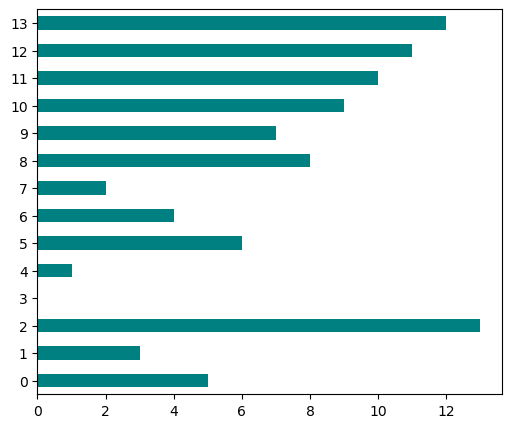

In [74]:
# Plotting the ranks
feat_importances = pd.Series(ind)
feat_importances.plot(kind= 'barh', color='teal', figsize=(6,5))
plt.savefig('AdaBoostSim.png')
plt.show()

In [76]:
X3=X1.iloc[:,[2,13,12]]
#X3=X1.iloc[:,[3,4,7]]
X3

,gender,diff_symp_hos,symptom6
0,1,8,1
1,0,0,1
2,1,13,1
3,0,0,1
4,1,0,1
...,...,...,...
1052,0,0,1
1079,2,0,1
1080,2,0,1
1081,2,0,1


In [77]:
import sklearn
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
cvscores=[]
kfold = StratifiedKFold(shuffle=True)
from sklearn.ensemble import RandomForestClassifier

for train, test in kfold.split(X3,y1):
    clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(X3.iloc[train], y1.iloc[train])
    clf_predictions = clf.predict(X3.iloc[test])
    aa=accuracy_score(y1.iloc[test], clf_predictions)
    print(aa)
    cvscores.append(aa)
print(cvscores, np.mean(cvscores))

0.9404761904761905
0.9285714285714286
0.9345238095238095
0.9166666666666666
0.9281437125748503
[0.9404761904761905, 0.9285714285714286, 0.9345238095238095, 0.9166666666666666, 0.9281437125748503] 0.9296763615625891


In [71]:
FS1=X1.iloc[:,[2]]
FS1

,gender
0,1
1,0
2,1
3,0
4,1
...,...
1052,0
1079,2
1080,2
1081,2


In [72]:
cvscores=[]
kfold = StratifiedKFold(shuffle=True)
from sklearn.ensemble import RandomForestClassifier

for train, test in kfold.split(FS1,y1):
    clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(FS1.iloc[train], y1.iloc[train])
    clf_predictions = clf.predict(FS1.iloc[test])
    aa=accuracy_score(y1.iloc[test], clf_predictions)
    print(aa)
    cvscores.append(aa)
print(cvscores, np.mean(cvscores))

0.9345238095238095
0.9285714285714286
0.9285714285714286
0.9285714285714286
0.9341317365269461
[0.9345238095238095, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9341317365269461] 0.9308739663530083


In [73]:
FS2=X1.iloc[:,[2,13]]
FS2

,gender,diff_symp_hos
0,1,8
1,0,0
2,1,13
3,0,0
4,1,0
...,...,...
1052,0,0
1079,2,0
1080,2,0
1081,2,0


In [75]:
cvscores=[]
part=FS2
kfold = StratifiedKFold(shuffle=True)
from sklearn.ensemble import RandomForestClassifier

for train, test in kfold.split(part,y1):
    clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(part.iloc[train], y1.iloc[train])
    clf_predictions = clf.predict(part.iloc[test])
    aa=accuracy_score(y1.iloc[test], clf_predictions)
    print(aa)
    cvscores.append(aa)
print(cvscores, np.mean(cvscores))

0.9285714285714286
0.9285714285714286
0.9226190476190477
0.9285714285714286
0.9341317365269461
[0.9285714285714286, 0.9285714285714286, 0.9226190476190477, 0.9285714285714286, 0.9341317365269461] 0.928493013972056


In [42]:
##FS3 yapıldı, yukarıda.

FS5=X1.iloc[:,[2,13,12,11,10]]
FS5

,gender,diff_symp_hos,symptom6,symptom5,symptom4
0,1,8,1,3,12
1,0,0,1,3,12
2,1,13,1,3,12
3,0,0,1,3,12
4,1,0,1,3,12
...,...,...,...,...,...
1052,0,0,1,3,12
1079,2,0,1,3,12
1080,2,0,1,3,12
1081,2,0,1,3,12


In [45]:
cvscores=[]
part=FS5
kfold = StratifiedKFold(shuffle=True)
from sklearn.ensemble import RandomForestClassifier

for train, test in kfold.split(part,y1):
    clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(part.iloc[train], y1.iloc[train])
    clf_predictions = clf.predict(part.iloc[test])
    aa=accuracy_score(y1.iloc[test], clf_predictions)
    print(aa)
    cvscores.append(aa)
print(cvscores, np.mean(cvscores))

0.9345238095238095
0.9166666666666666
0.9226190476190477
0.8988095238095238
0.9341317365269461
[0.9345238095238095, 0.9166666666666666, 0.9226190476190477, 0.8988095238095238, 0.9341317365269461] 0.9213501568291986


In [46]:
FS7=X1.iloc[:,[2,13,12,11,10,8,9]]
FS7

,gender,diff_symp_hos,symptom6,symptom5,symptom4,symptom2,symptom3
0,1,8,1,3,12,31,23
1,0,0,1,3,12,31,23
2,1,13,1,3,12,31,23
3,0,0,1,3,12,31,23
4,1,0,1,3,12,31,23
...,...,...,...,...,...,...,...
1052,0,0,1,3,12,31,23
1079,2,0,1,3,12,31,23
1080,2,0,1,3,12,31,23
1081,2,0,1,3,12,31,23


In [47]:
cvscores=[]
part=FS7
kfold = StratifiedKFold(shuffle=True)
from sklearn.ensemble import RandomForestClassifier

for train, test in kfold.split(part,y1):
    clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(part.iloc[train], y1.iloc[train])
    clf_predictions = clf.predict(part.iloc[test])
    aa=accuracy_score(y1.iloc[test], clf_predictions)
    print(aa)
    cvscores.append(aa)
print(cvscores, np.mean(cvscores))

0.9166666666666666
0.9345238095238095
0.9285714285714286
0.9166666666666666
0.9401197604790419
[0.9166666666666666, 0.9345238095238095, 0.9285714285714286, 0.9166666666666666, 0.9401197604790419] 0.9273096663815228


In [ ]:
##########################################

In [30]:
from sklearn.metrics import confusion_matrix
accuracy_score(y1.iloc[test], clf_predictions)
# creating a confusion matrix
cm = confusion_matrix(y1.iloc[test], clf_predictions)

[[152   4]
 [  7   4]]


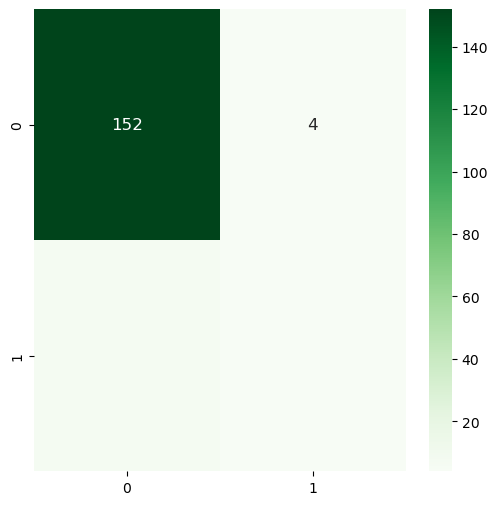

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
print(cm)
plt.figure(figsize = (6,6))
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g', annot_kws={"size": 12})
plt.savefig('AdaBoostFischer2Feat.png')
plt.show()

In [ ]:
############ Information Gain

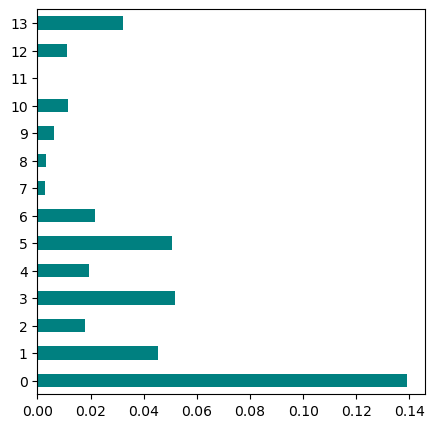

In [50]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X1,y1)
feat_importance = pd.Series(importance)
feat_importance.plot(kind='barh', color='teal', figsize=(5,5))
plt.savefig('IGModel.png')

In [51]:
feat_importance

0     0.138883
1     0.045252
2     0.017807
3     0.051806
4     0.019576
5     0.050471
6     0.021629
7     0.002983
8     0.003092
9     0.006182
10    0.011318
11    0.000000
12    0.011040
13    0.032118
dtype: float64

In [52]:
importance

array([0.13888309, 0.04525223, 0.01780691, 0.05180601, 0.01957557,
       0.05047122, 0.02162876, 0.00298317, 0.00309218, 0.00618227,
       0.01131774, 0.        , 0.01103967, 0.03211801])

In [53]:
#IG7=X1.iloc[:,[0,3,5,1,13,6,4]]
IG1=X1.iloc[:,[0]]
IG1

,location
0,116
1,113
2,154
3,129
4,129
...,...
1052,74
1079,53
1080,53
1081,0


In [54]:
cvscores=[]
part=IG1
kfold = StratifiedKFold(shuffle=True)
from sklearn.ensemble import RandomForestClassifier

for train, test in kfold.split(part,y1):
    clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(part.iloc[train], y1.iloc[train])
    clf_predictions = clf.predict(part.iloc[test])
    aa=accuracy_score(y1.iloc[test], clf_predictions)
    print(aa)
    cvscores.append(aa)
print(cvscores, np.mean(cvscores))

0.9821428571428571
0.9523809523809523
0.9880952380952381
0.9642857142857143
0.9700598802395209
[0.9821428571428571, 0.9523809523809523, 0.9880952380952381, 0.9642857142857143, 0.9700598802395209] 0.9713929284288566


In [55]:
#IG7=X1.iloc[:,[0,3,5,1,13,6,4]]
IG2=X1.iloc[:,[0,3]]
IG2

,location,age
0,116,66.0
1,113,56.0
2,154,46.0
3,129,60.0
4,129,58.0
...,...,...
1052,74,45.0
1079,53,24.0
1080,53,24.0
1081,0,35.0


In [57]:
cvscores=[]
part=IG2
kfold = StratifiedKFold(shuffle=True)
from sklearn.ensemble import RandomForestClassifier

for train, test in kfold.split(part,y1):
    clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(part.iloc[train], y1.iloc[train])
    clf_predictions = clf.predict(part.iloc[test])
    aa=accuracy_score(y1.iloc[test], clf_predictions)
    print(aa)
    cvscores.append(aa)
print(cvscores, np.mean(cvscores))

0.9702380952380952
0.9821428571428571
0.9880952380952381
0.9761904761904762
0.9640718562874252
[0.9702380952380952, 0.9821428571428571, 0.9880952380952381, 0.9761904761904762, 0.9640718562874252] 0.9761477045908185


In [58]:
#IG7=X1.iloc[:,[0,3,5,1,13,6,4]]
IG3=X1.iloc[:,[0,3,5]]
IG3

,location,age,from_wuhan
0,116,66.0,0.0
1,113,56.0,1.0
2,154,46.0,1.0
3,129,60.0,0.0
4,129,58.0,0.0
...,...,...,...
1052,74,45.0,0.0
1079,53,24.0,0.0
1080,53,24.0,0.0
1081,0,35.0,0.0


In [60]:
cvscores=[]
part=IG3
kfold = StratifiedKFold(shuffle=True)
from sklearn.ensemble import RandomForestClassifier

for train, test in kfold.split(part,y1):
    clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(part.iloc[train], y1.iloc[train])
    clf_predictions = clf.predict(part.iloc[test])
    aa=accuracy_score(y1.iloc[test], clf_predictions)
    print(aa)
    cvscores.append(aa)
print(cvscores, np.mean(cvscores))

0.9761904761904762
0.9761904761904762
0.9702380952380952
0.9642857142857143
0.9760479041916168
[0.9761904761904762, 0.9761904761904762, 0.9702380952380952, 0.9642857142857143, 0.9760479041916168] 0.9725905332192758


In [61]:
#IG7=X1.iloc[:,[0,3,5,1,13,6,4]]
IG5=X1.iloc[:,[0,3,5,1,13]]
IG5

,location,age,from_wuhan,country,diff_symp_hos
0,116,66.0,0.0,8,8
1,113,56.0,1.0,8,0
2,154,46.0,1.0,8,13
3,129,60.0,0.0,8,0
4,129,58.0,0.0,8,0
...,...,...,...,...,...
1052,74,45.0,0.0,21,0
1079,53,24.0,0.0,3,0
1080,53,24.0,0.0,3,0
1081,0,35.0,0.0,0,0


In [66]:
cvscores=[]
part=IG5
kfold = StratifiedKFold(shuffle=True)
from sklearn.ensemble import RandomForestClassifier

for train, test in kfold.split(part,y1):
    clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(part.iloc[train], y1.iloc[train])
    clf_predictions = clf.predict(part.iloc[test])
    aa=accuracy_score(y1.iloc[test], clf_predictions)
    print(aa)
    cvscores.append(aa)
print(cvscores, np.mean(cvscores))

0.9761904761904762
0.9761904761904762
0.9523809523809523
0.9523809523809523
0.9640718562874252
[0.9761904761904762, 0.9761904761904762, 0.9523809523809523, 0.9523809523809523, 0.9640718562874252] 0.9642429426860565


In [67]:
IG7=X1.iloc[:,[0,3,5,1,13,6,4]]
#IG5=X1.iloc[:,[0,3,5,1,13]]
IG7

,location,age,from_wuhan,country,diff_symp_hos,recov,vis_wuhan
0,116,66.0,0.0,8,8,0,1
1,113,56.0,1.0,8,0,0,0
2,154,46.0,1.0,8,13,0,0
3,129,60.0,0.0,8,0,0,1
4,129,58.0,0.0,8,0,0,0
...,...,...,...,...,...,...,...
1052,74,45.0,0.0,21,0,0,0
1079,53,24.0,0.0,3,0,0,0
1080,53,24.0,0.0,3,0,0,0
1081,0,35.0,0.0,0,0,0,0


In [70]:
cvscores=[]
part=IG7
kfold = StratifiedKFold(shuffle=True)
from sklearn.ensemble import RandomForestClassifier

for train, test in kfold.split(part,y1):
    clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(part.iloc[train], y1.iloc[train])
    clf_predictions = clf.predict(part.iloc[test])
    aa=accuracy_score(y1.iloc[test], clf_predictions)
    print(aa)
    cvscores.append(aa)
print(cvscores, np.mean(cvscores))

0.9523809523809523
0.9702380952380952
0.9761904761904762
0.9523809523809523
0.9700598802395209
[0.9523809523809523, 0.9702380952380952, 0.9761904761904762, 0.9523809523809523, 0.9700598802395209] 0.9642500712859995
